## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  50.747766   542.593526  0.245679  8.722698   142.840569
1  39.250618   802.238266  0.687235  2.561944   552.845233
2  66.347738  1613.333811  0.697569  8.417917  1127.267000
3  20.023518   826.570269  0.004893  3.734010    20.415777
4  56.047122   533.355150  0.465104  9.618785   254.271881


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0010610	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9890012	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9788865	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9676738	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9553062	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9436181	total: 60.2ms	remaining: 9.98s
6:	learn: 0.9316870	total: 60.7ms	remaining: 8.62s
7:	learn: 0.9202668	total: 61.2ms	remaining: 7.59s
8:	learn: 0.9087480	total: 61.8ms	remaining: 6.8s
9:	learn: 0.8960506	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8855846	total: 62.7ms	remaining: 5.64s
11:	learn: 0.8725953	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8623337	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8502263	total: 64ms	remaining: 4.51s
14:	learn: 0.8401067	total: 64.5ms	remaining: 4.24s
15:	learn: 0.8308005	total: 65ms	remaining: 4s
16:	learn: 0.8191169	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8098640	total: 66ms	remaining: 3.6s
18:	learn: 0.8016286	total: 66.4ms	remaining: 3.43s
19:	

111:	learn: 0.2949300	total: 106ms	remaining: 839ms
112:	learn: 0.2913773	total: 107ms	remaining: 836ms
113:	learn: 0.2882176	total: 107ms	remaining: 831ms
114:	learn: 0.2850465	total: 107ms	remaining: 826ms
115:	learn: 0.2825377	total: 108ms	remaining: 821ms
116:	learn: 0.2803013	total: 108ms	remaining: 815ms
117:	learn: 0.2773473	total: 108ms	remaining: 810ms
118:	learn: 0.2745008	total: 109ms	remaining: 806ms
119:	learn: 0.2721219	total: 109ms	remaining: 803ms
120:	learn: 0.2696125	total: 110ms	remaining: 798ms
121:	learn: 0.2669084	total: 110ms	remaining: 794ms
122:	learn: 0.2644979	total: 111ms	remaining: 790ms
123:	learn: 0.2626123	total: 111ms	remaining: 786ms
124:	learn: 0.2604978	total: 112ms	remaining: 783ms
125:	learn: 0.2585095	total: 112ms	remaining: 778ms
126:	learn: 0.2562675	total: 113ms	remaining: 773ms
127:	learn: 0.2536547	total: 113ms	remaining: 769ms
128:	learn: 0.2514481	total: 113ms	remaining: 764ms
129:	learn: 0.2493656	total: 114ms	remaining: 760ms
130:	learn: 

290:	learn: 0.0787979	total: 186ms	remaining: 453ms
291:	learn: 0.0782943	total: 187ms	remaining: 453ms
292:	learn: 0.0779742	total: 187ms	remaining: 451ms
293:	learn: 0.0776561	total: 187ms	remaining: 450ms
294:	learn: 0.0773235	total: 188ms	remaining: 449ms
295:	learn: 0.0769649	total: 188ms	remaining: 448ms
296:	learn: 0.0764604	total: 189ms	remaining: 447ms
297:	learn: 0.0759789	total: 189ms	remaining: 445ms
298:	learn: 0.0756957	total: 189ms	remaining: 444ms
299:	learn: 0.0753925	total: 190ms	remaining: 443ms
300:	learn: 0.0750667	total: 190ms	remaining: 442ms
301:	learn: 0.0745906	total: 191ms	remaining: 441ms
302:	learn: 0.0740995	total: 191ms	remaining: 439ms
303:	learn: 0.0738238	total: 191ms	remaining: 438ms
304:	learn: 0.0735336	total: 192ms	remaining: 437ms
305:	learn: 0.0732233	total: 192ms	remaining: 436ms
306:	learn: 0.0729347	total: 193ms	remaining: 435ms
307:	learn: 0.0724138	total: 193ms	remaining: 434ms
308:	learn: 0.0719338	total: 194ms	remaining: 434ms
309:	learn: 

526:	learn: 0.0268216	total: 287ms	remaining: 258ms
527:	learn: 0.0266431	total: 288ms	remaining: 257ms
528:	learn: 0.0265238	total: 288ms	remaining: 257ms
529:	learn: 0.0263712	total: 288ms	remaining: 256ms
530:	learn: 0.0262187	total: 289ms	remaining: 255ms
531:	learn: 0.0260685	total: 289ms	remaining: 254ms
532:	learn: 0.0260168	total: 290ms	remaining: 254ms
533:	learn: 0.0258576	total: 290ms	remaining: 253ms
534:	learn: 0.0257826	total: 291ms	remaining: 253ms
535:	learn: 0.0257324	total: 291ms	remaining: 252ms
536:	learn: 0.0256839	total: 291ms	remaining: 251ms
537:	learn: 0.0256361	total: 292ms	remaining: 251ms
538:	learn: 0.0255019	total: 292ms	remaining: 250ms
539:	learn: 0.0254548	total: 293ms	remaining: 250ms
540:	learn: 0.0253241	total: 293ms	remaining: 249ms
541:	learn: 0.0252778	total: 294ms	remaining: 248ms
542:	learn: 0.0252022	total: 294ms	remaining: 248ms
543:	learn: 0.0250610	total: 295ms	remaining: 247ms
544:	learn: 0.0249818	total: 295ms	remaining: 246ms
545:	learn: 

705:	learn: 0.0145464	total: 368ms	remaining: 153ms
706:	learn: 0.0144875	total: 368ms	remaining: 153ms
707:	learn: 0.0144114	total: 369ms	remaining: 152ms
708:	learn: 0.0143216	total: 369ms	remaining: 151ms
709:	learn: 0.0142576	total: 370ms	remaining: 151ms
710:	learn: 0.0141945	total: 370ms	remaining: 150ms
711:	learn: 0.0141045	total: 371ms	remaining: 150ms
712:	learn: 0.0140362	total: 371ms	remaining: 149ms
713:	learn: 0.0139798	total: 371ms	remaining: 149ms
714:	learn: 0.0139057	total: 372ms	remaining: 148ms
715:	learn: 0.0138426	total: 372ms	remaining: 148ms
716:	learn: 0.0137804	total: 373ms	remaining: 147ms
717:	learn: 0.0137192	total: 373ms	remaining: 146ms
718:	learn: 0.0136941	total: 373ms	remaining: 146ms
719:	learn: 0.0136340	total: 374ms	remaining: 145ms
720:	learn: 0.0136093	total: 374ms	remaining: 145ms
721:	learn: 0.0135886	total: 375ms	remaining: 144ms
722:	learn: 0.0135626	total: 375ms	remaining: 144ms
723:	learn: 0.0135371	total: 375ms	remaining: 143ms
724:	learn: 

933:	learn: 0.0071045	total: 470ms	remaining: 33.2ms
934:	learn: 0.0070805	total: 470ms	remaining: 32.7ms
935:	learn: 0.0070514	total: 471ms	remaining: 32.2ms
936:	learn: 0.0070256	total: 471ms	remaining: 31.7ms
937:	learn: 0.0069971	total: 472ms	remaining: 31.2ms
938:	learn: 0.0069729	total: 472ms	remaining: 30.7ms
939:	learn: 0.0069477	total: 472ms	remaining: 30.1ms
940:	learn: 0.0069198	total: 473ms	remaining: 29.6ms
941:	learn: 0.0068962	total: 473ms	remaining: 29.1ms
942:	learn: 0.0068623	total: 473ms	remaining: 28.6ms
943:	learn: 0.0068338	total: 474ms	remaining: 28.1ms
944:	learn: 0.0068095	total: 474ms	remaining: 27.6ms
945:	learn: 0.0067853	total: 475ms	remaining: 27.1ms
946:	learn: 0.0067616	total: 475ms	remaining: 26.6ms
947:	learn: 0.0067347	total: 476ms	remaining: 26.1ms
948:	learn: 0.0067083	total: 476ms	remaining: 25.6ms
949:	learn: 0.0066746	total: 477ms	remaining: 25.1ms
950:	learn: 0.0066489	total: 477ms	remaining: 24.6ms
951:	learn: 0.0066159	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

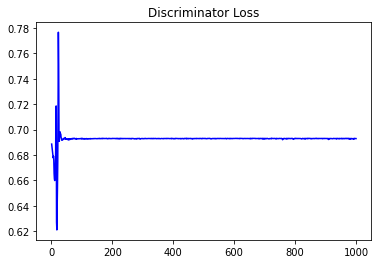

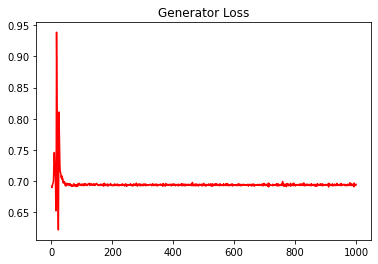

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.009312793601060743


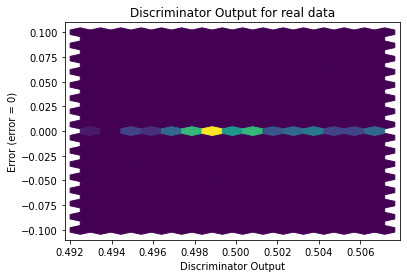

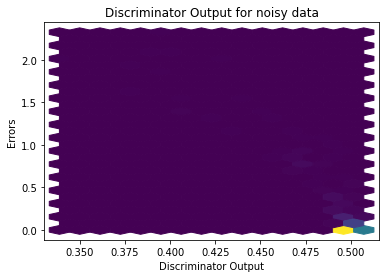

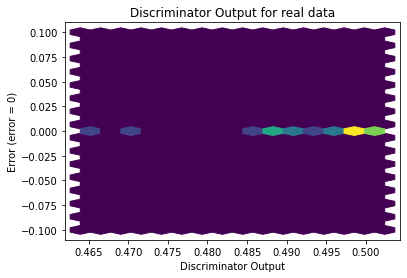

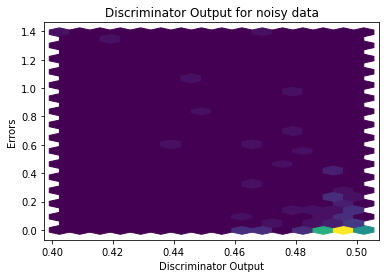

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


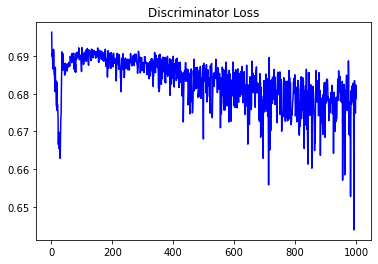

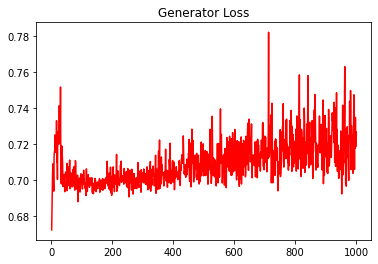

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008636504221844058


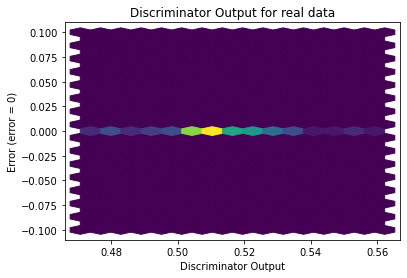

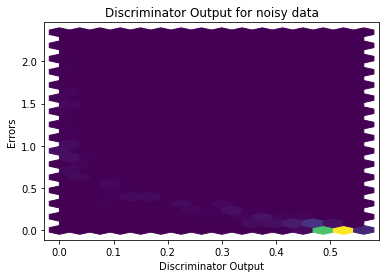

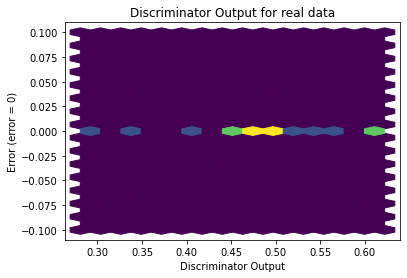

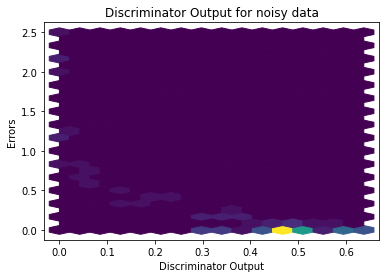

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1484]], requires_grad=True)
